PRAVEENA ANAND [CH.SC.U4CSE23044]

**SUPPORT VECTOR MACHINE:**

**Emails Dataset:**

Importing Required Libraries:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns

Load the Dataset:

In [16]:
data = pd.read_csv("/content/emails.csv")

Display First Few Rows:

In [17]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


Drop Non - Numeric Columns (like ID, Email text etc.):

In [18]:
X = data.drop(columns=['spam'])
y = data['spam']

Keep Only Numeric Columns for Features:

In [19]:
X = X.select_dtypes(include=[np.number])

Handle Missing Values (Impute With Mean):

In [20]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

Split into Training and Testing Data:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Scaling:

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train SVM Classifier (Linear Kernel for Text - Like Data):

In [23]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Predictions:

In [24]:
y_pred = clf.predict(X_test)

Evaluation:

In [25]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9896907216494846

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1531
           1       0.76      0.65      0.70        20
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0

    accuracy                           0.99      1552
   macro avg       0.35      0.33      0.34      1552
weighted avg       0.99      0.99      0.99      1552



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Confusion Matrix Heatmap:

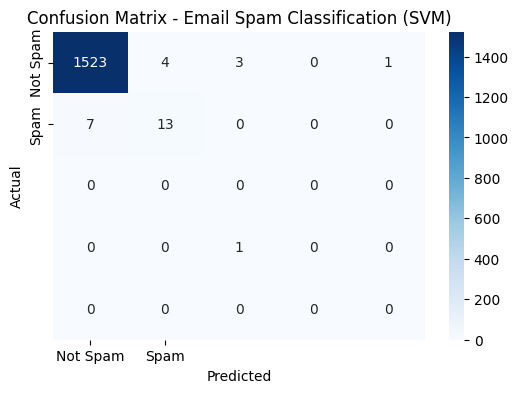

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.title("Confusion Matrix - Email Spam Classification (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()